In [16]:
library(martini)
library(caret)
library(tidyverse)

experiments <- list.dirs(recursive = F)
experiments <- gsub("./", "", experiments, fixed = T)
experiments <- experiments[lapply(experiments, nchar) == 30]

In [19]:
# fetch network
load("../../data/genesis/gi.net")
W <- igraph::as_adj(net)

In [20]:
load(paste0(experiments[1], "/simGwas.RData"))
X <- as(gwas$genotypes, "numeric")
Y <- gwas$fam$affected

In [21]:
load(paste0(experiments[1], "/causal.RData"))
causal <- as.numeric(causal)

In [54]:
etas <- 10^(-7:4)
lambdas <- 10^(-7:7)

grid <- lapply(etas, function(e) {
    lapply(lambdas, function(l) {
        settings <- martini:::get_evo_settings(etas = e, lambdas = l)
        test <- martini:::evo(X, Y, W, settings)

        suppressWarnings(x <- confusionMatrix(test$selected, causal, positive = '1'))
        x$byClass[["F1"]]
    }) %>% do.call(c, .)
}) %>% do.call(rbind, .)

rownames(grid) <- etas
colnames(grid) <- lambdas

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 1e-07

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 1e-06

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 1e-05

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 0.0001

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 0.001

Computing univariate association.
Selecting the best hyperparameters...
Running models.
Finding best model.
Searching ConES with eta = 1e-07 and lambda = 0.01

Computing univariate association.


limit_output extension: Maximum message size of 10000 exceeded with 38568 characters

In [42]:
grid

,1e-07,1e-06,1e-05,1e-04,0.001,0.01,0.1,1,10,100,1000,10000,1e+05,1e+06,1e+07
1e-07,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
1e-06,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
1e-05,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
1e-04,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
0.001,0.4800000,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
0.01,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
0.1,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
1,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
10,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.4800000,0.6285714,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105,0.6842105
100,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message in heatmap.2(grid2, Rowv = FALSE, Colv = FALSE):
“Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram.”Warning message in heatmap.2(grid2, Rowv = FALSE, Colv = FALSE):
“Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram.”

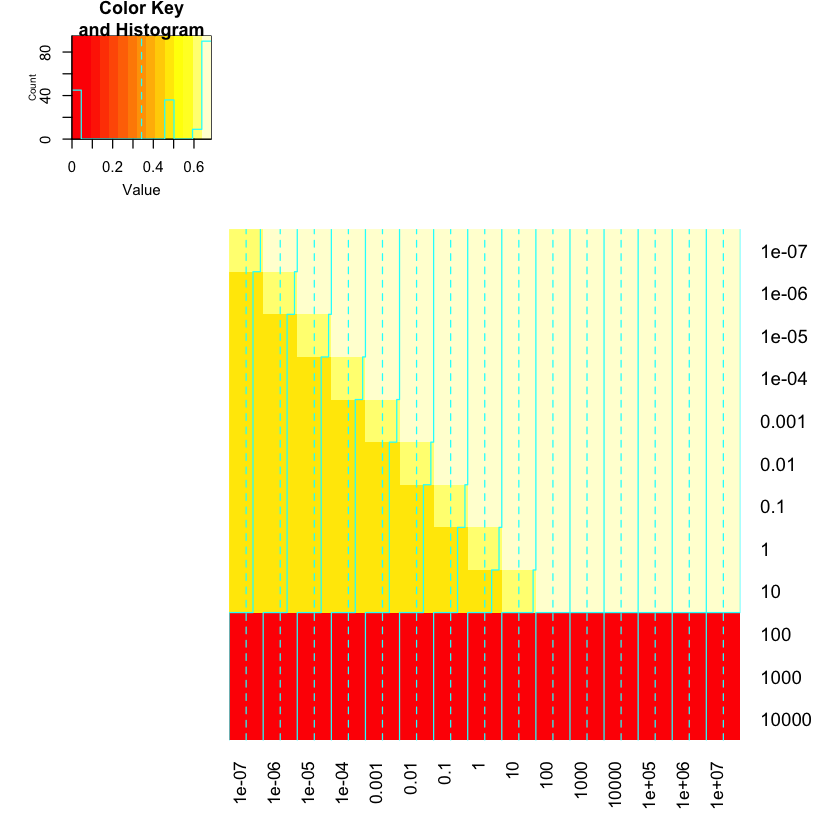

In [51]:
library(gplots)

grid2 <- grid
grid2[is.na(grid)] <- 0
heatmap.2(grid2, Rowv=FALSE, Colv=FALSE)

In [32]:
as.numeric(solution)

[1] 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1